# 1- Data Preprocessing

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [34]:
df.shape

(6607, 20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# 2- Performing EDA

In [36]:
# Here, the cols with object dtype is converted into category dtype which is benefical to memory usage.
obj_cols = df.select_dtypes(include= 'object').columns
df[obj_cols] = df[obj_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [37]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [38]:
# Dealing with Missing Cols.
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

display(df.isnull().sum())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


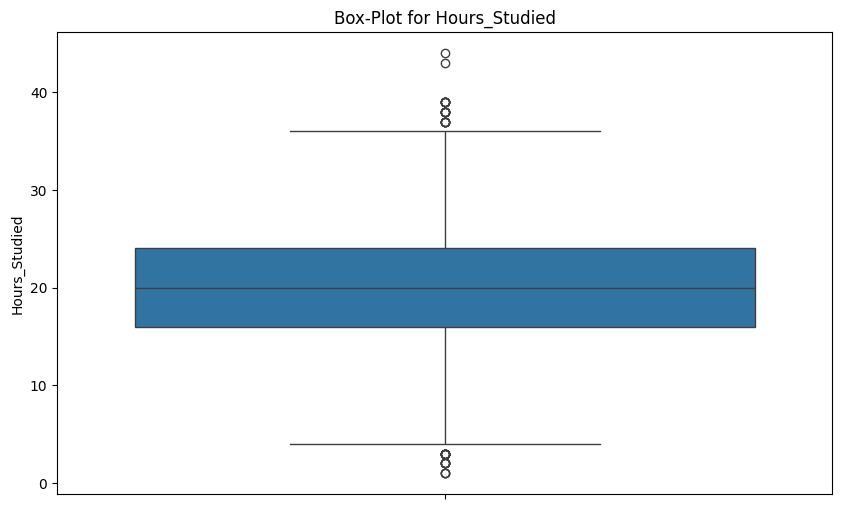

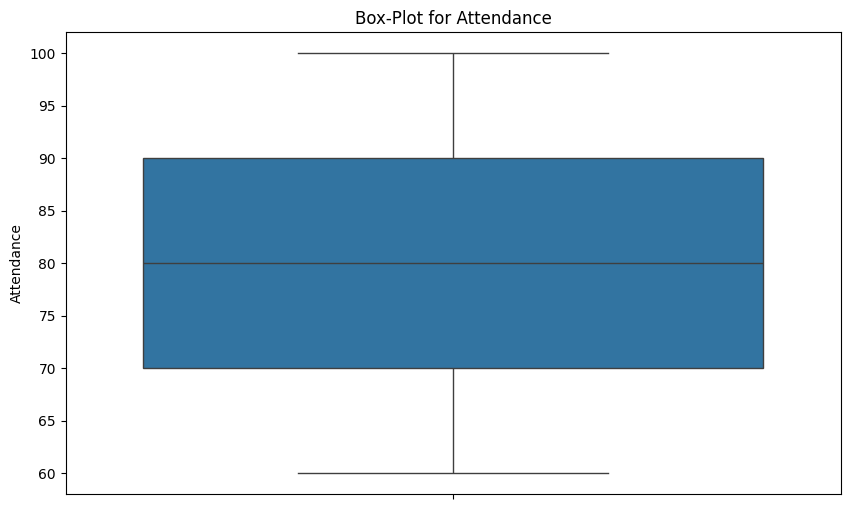

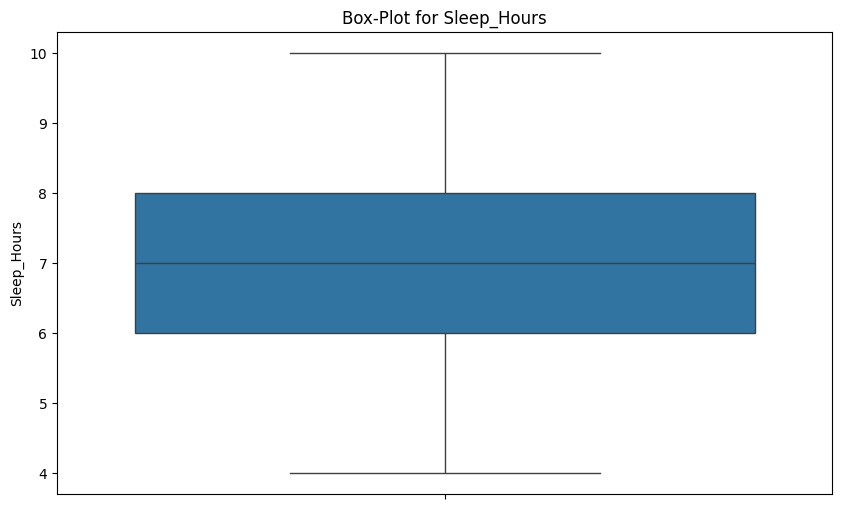

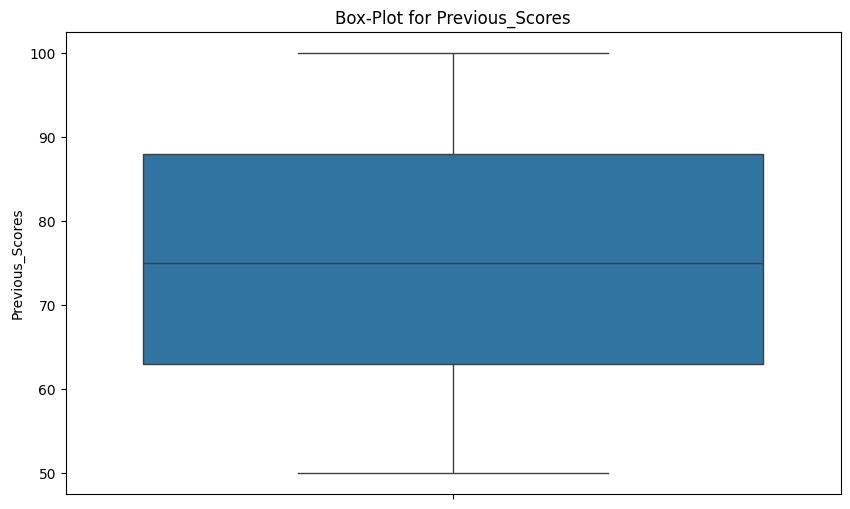

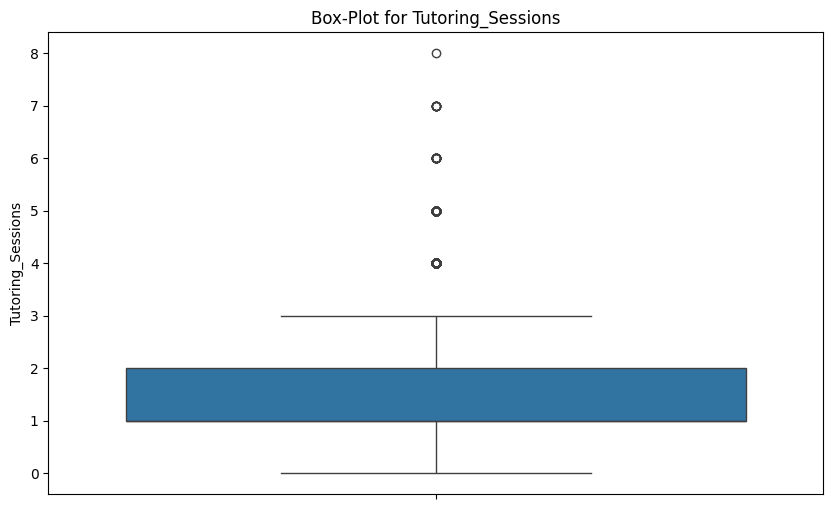

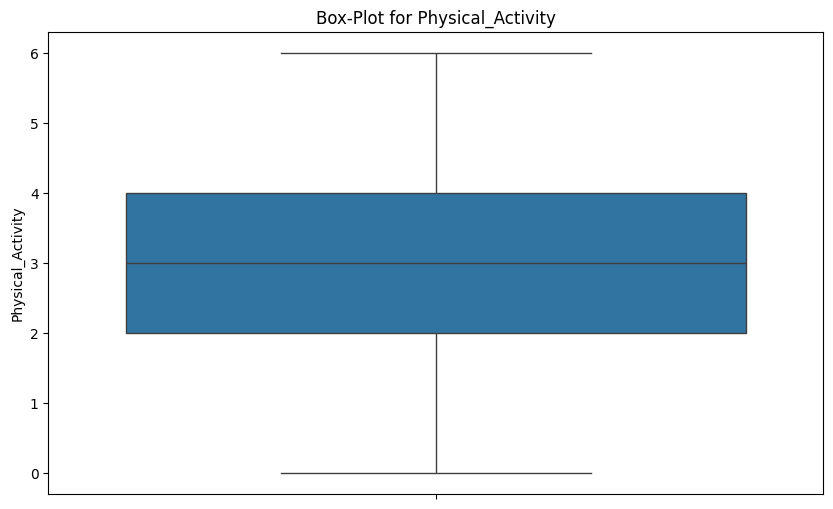

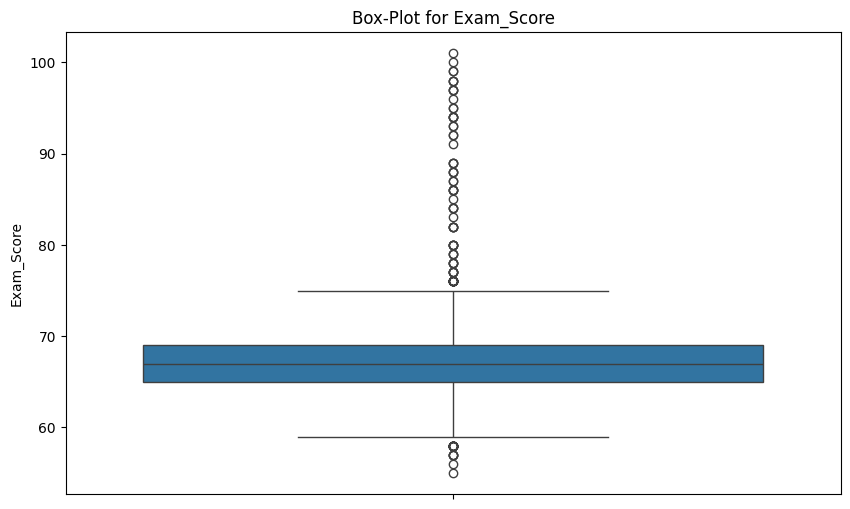

In [39]:
# Plotting numerical cols.
num_cols = df.select_dtypes(['int64']).columns
for cols in num_cols:
    plt.figure(figsize= (10, 6))
    sns.boxplot(df[cols])
    plt.title(f'Box-Plot for {cols}')
    plt.show()

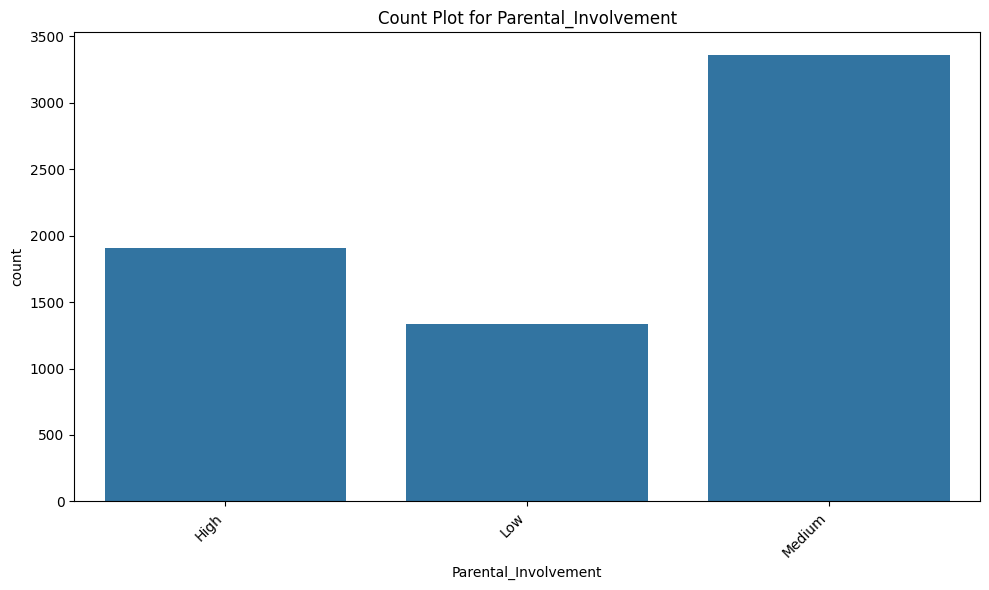

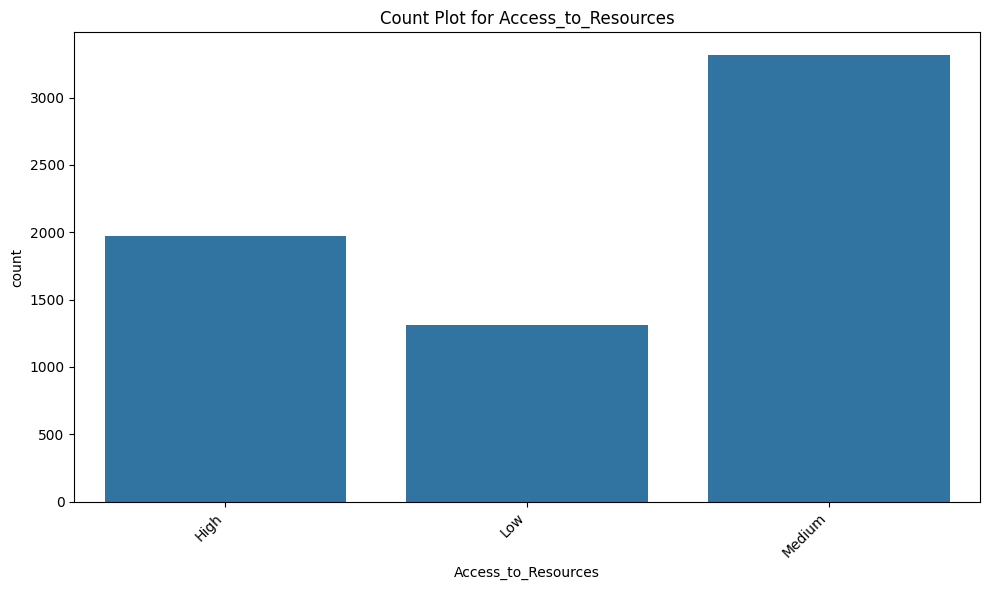

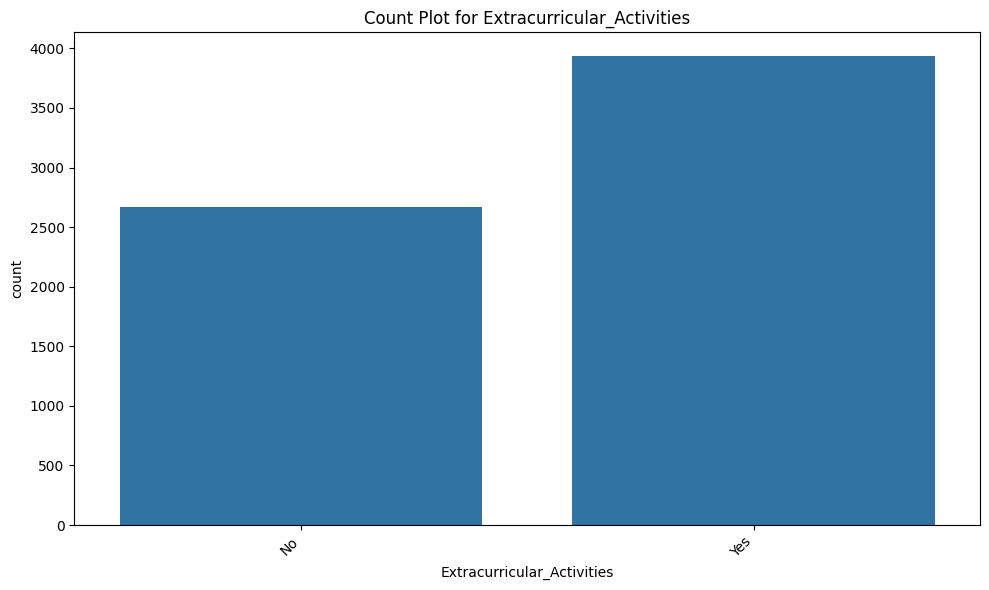

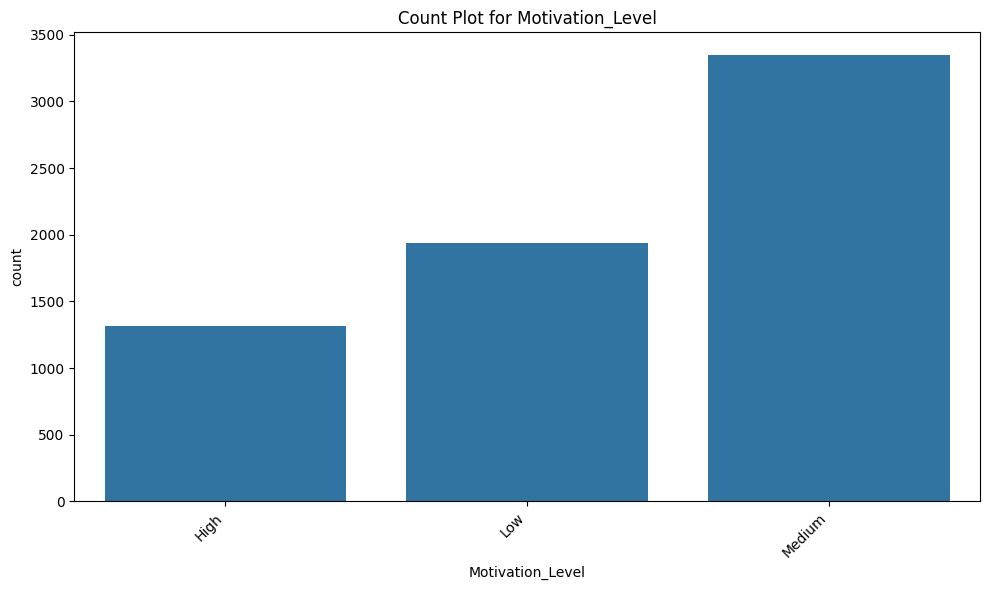

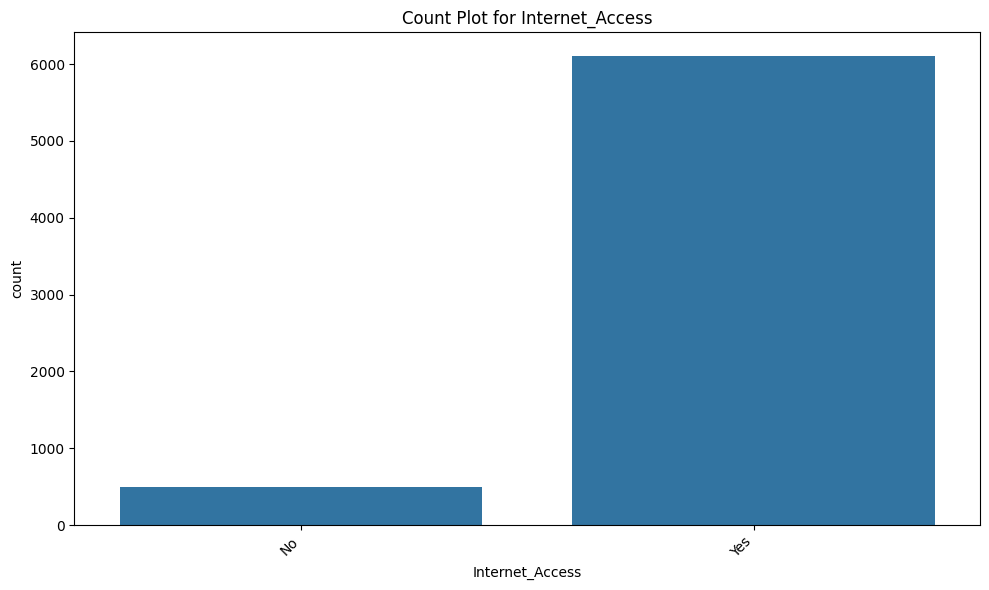

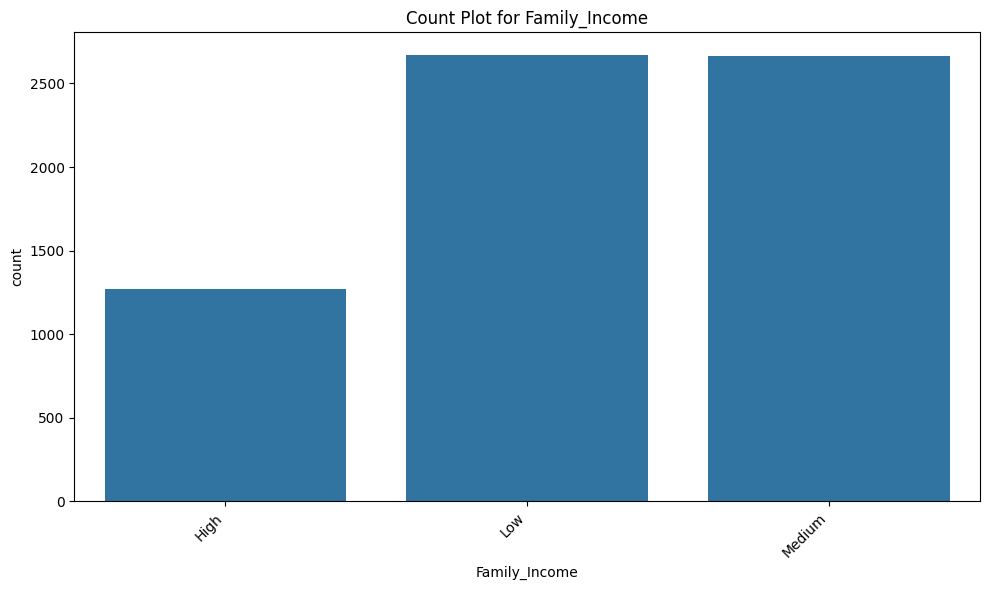

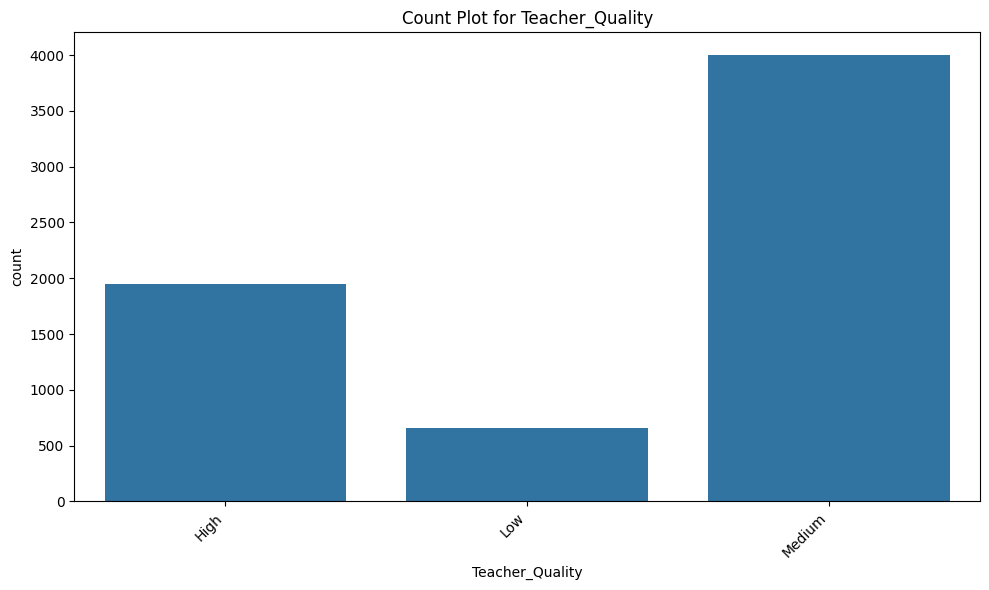

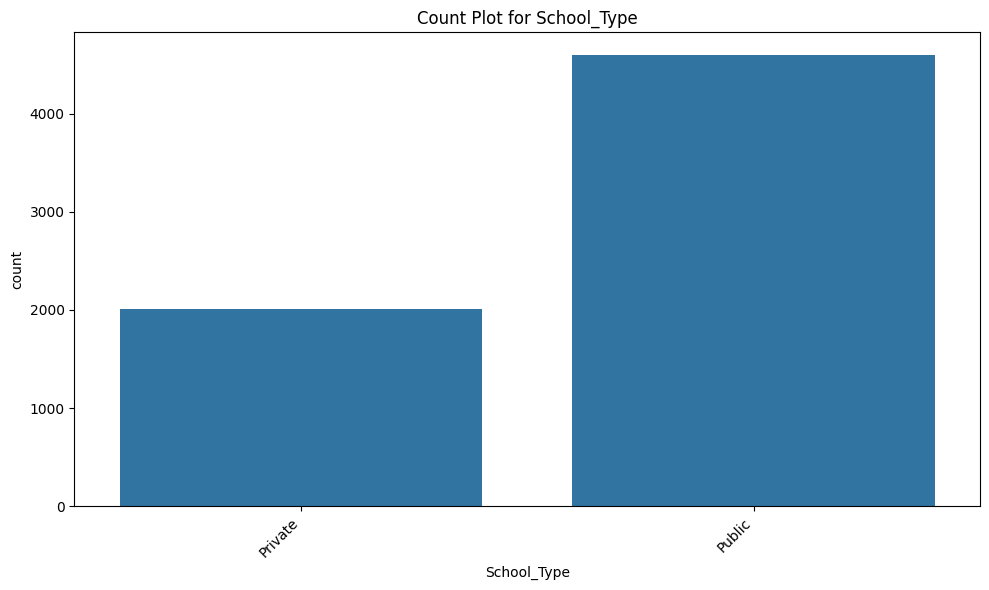

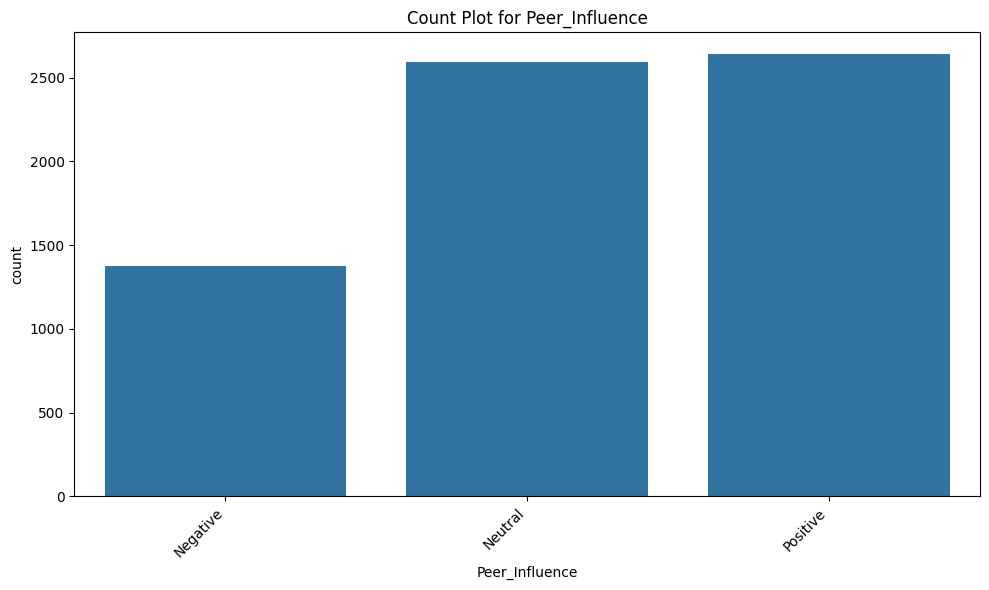

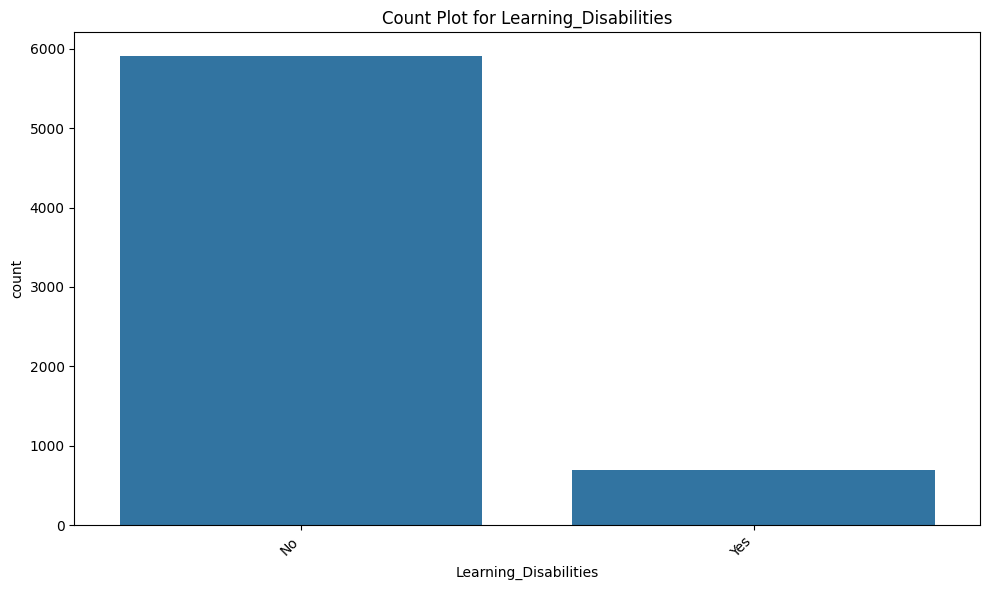

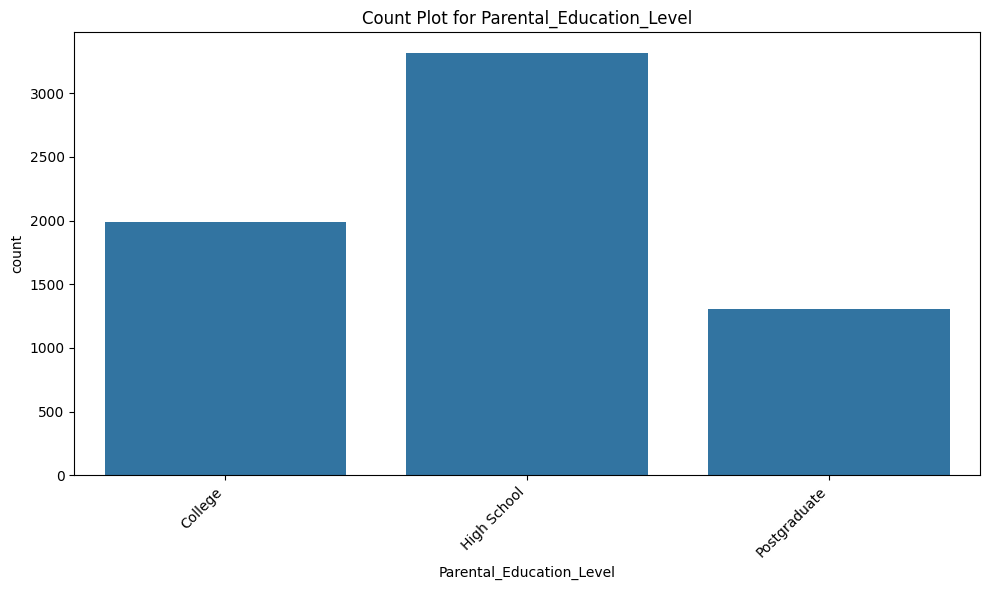

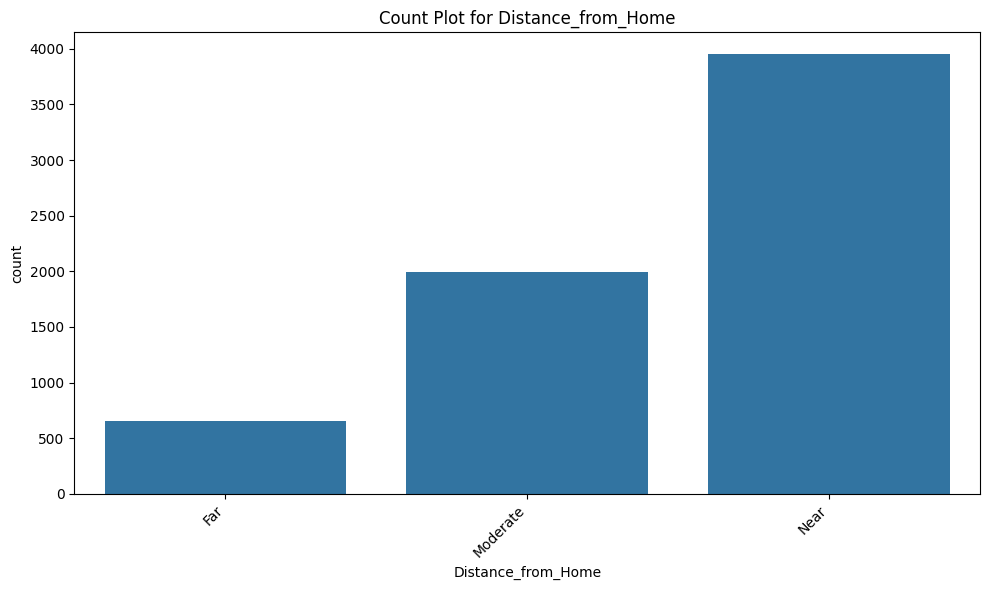

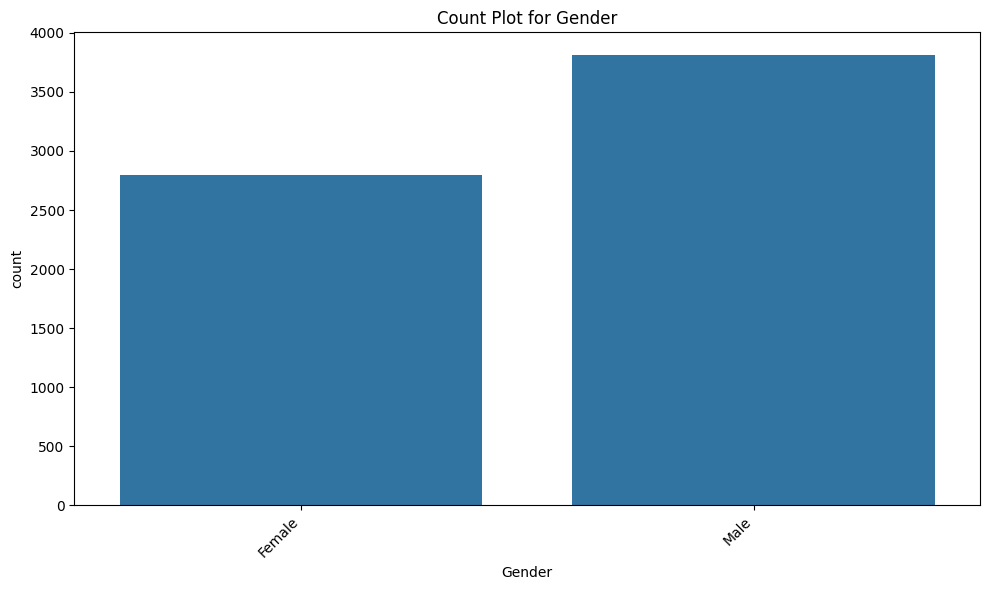

In [40]:
# Plotting categorical cols.
categorical_cols = df.select_dtypes(include= 'category').columns
for col in categorical_cols:
    plt.figure(figsize= (10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3- Encoding Categ & Numerical Cols

In [41]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include= 'category').columns
for cols in categorical_cols:
    df[cols] = le.fit_transform(df[cols])

display(df.sample(5))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3971,13,73,2,1,0,9,59,2,1,0,2,0,1,1,4,0,2,2,1,63
2742,20,73,2,1,1,8,93,0,1,1,1,0,1,0,4,0,1,0,1,65
2855,17,91,1,2,1,4,54,0,1,3,1,2,1,1,4,0,0,1,0,67
6295,24,67,0,2,0,9,55,0,1,2,1,1,1,2,2,0,0,1,1,65
3246,23,85,2,2,1,6,91,1,1,1,1,0,1,1,3,0,1,0,1,68


In [42]:
numerical_cols = df.select_dtypes(include= 'int64').columns
scaler = StandardScaler()
for cols in numerical_cols:
    df[cols] = scaler.fit_transform(df[[cols]])

display(df.sample(5))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
5783,2.174351,1.127826,-1.409559,0.913804,-1.214685,-0.019796,1.453567,0.884966,0.285825,-0.401242,-0.284883,-1.462550,0.661006,1.070550,-1.908165,-0.342867,1.579946,-0.743665,-1.168570,1.995892
4650,-0.162822,-0.257864,0.901062,-0.233356,0.823259,-0.019796,-1.463364,-0.393061,0.285825,0.411451,-0.284883,0.768332,-1.512845,1.070550,1.001199,-0.342867,0.148221,0.748407,-1.168570,-0.831754
4361,-0.830586,-1.297130,-1.409559,-1.380517,0.823259,0.661399,-0.213251,-0.393061,0.285825,0.411451,-0.284883,0.768332,-1.512845,-0.252518,-0.938377,2.916586,1.579946,-2.235736,0.855746,-1.088813
5080,-0.997527,-1.210525,0.901062,0.913804,0.823259,2.023788,-0.838307,-0.393061,0.285825,-1.213934,-0.284883,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,-0.743665,0.855746,-1.859989
6055,1.506587,-0.344469,0.901062,-0.233356,0.823259,1.342594,-0.213251,0.884966,0.285825,-0.401242,-1.632214,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,0.748407,0.855746,0.453539


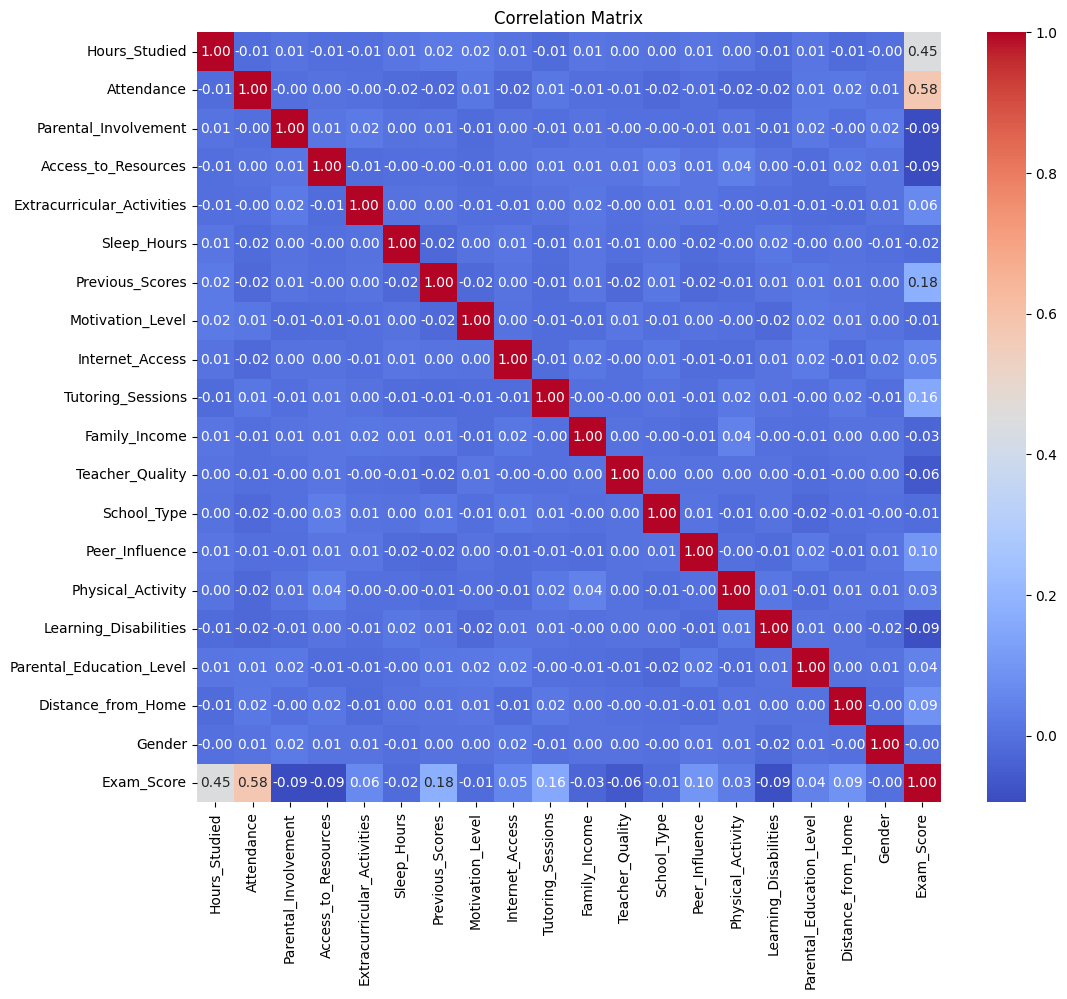

In [43]:
# Plotting Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4- Data Splitting & Model Selection.

In [44]:
x = df.drop(['Exam_Score'], axis= 1)
y = df['Exam_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
x_train.shape, x_test.shape

((5285, 19), (1322, 19))

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# 5- Model Evaluation.

In [46]:
print((f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}'))
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')

Mean Squared Error: 0.29
Mean Absolute Error: 0.26
R2 Score: 0.69


# 6- Plotting Actual vs Predicted Score

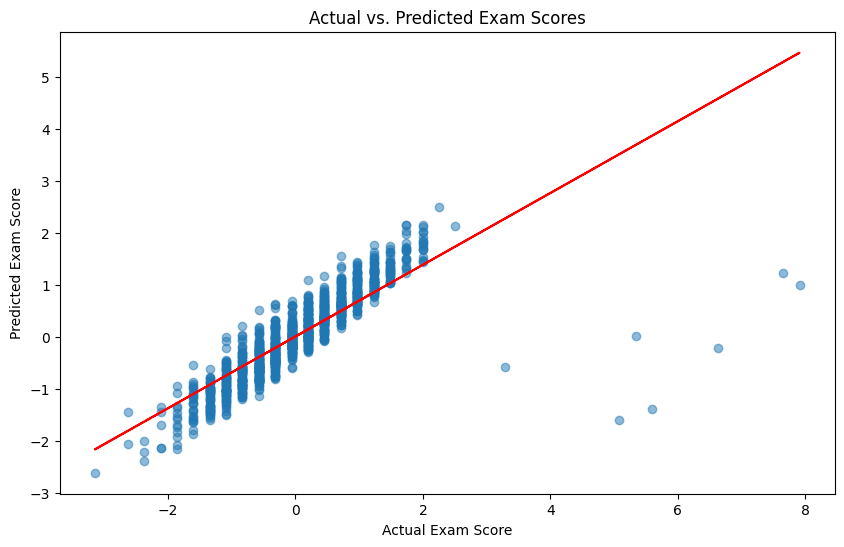

In [47]:
plt.figure(figsize=(10, 6))
m, b = np.polyfit(y_test, y_pred, 1) # Here, m will be slope of line & b will be y_intercept.
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, m*y_test + b, color='red')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

In [48]:
display(pd.DataFrame(lr.coef_, index=x.columns, columns=['Coefficient']))

,Coefficient
Hours_Studied,0.444431
Attendance,0.587146
Parental_Involvement,-0.099451
Access_to_Resources,-0.090627
Extracurricular_Activities,0.071782
Sleep_Hours,-0.011003
Previous_Scores,0.178120
Motivation_Level,-0.031082
Internet_Access,0.065735
Tutoring_Sessions,0.158905


# Bonus Work:

In [49]:
# Data Splitting and Model Selection.
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
poly = PolynomialFeatures(degree= 1)
xtrain_poly = poly.fit_transform(x_train)
xtest_poly = poly.transform(x_test)

In [51]:
model = LinearRegression()
model.fit(xtrain_poly, y_train)
y_pred = model.predict(xtest_poly)

In [52]:
# Model Evaluation.
print((f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}'))
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')

Mean Squared Error: 0.29
Mean Absolute Error: 0.26
R2 Score: 0.69


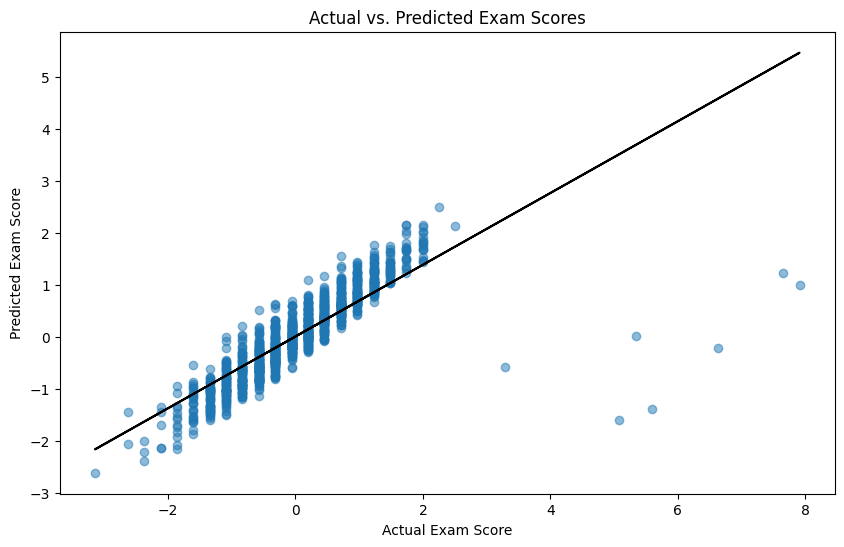

In [53]:
# Plotting Actual vs Pred Score
plt.figure(figsize=(10, 6))
m, b = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, m*y_test + b, color='black')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()